# Week 3
#### Reading the cleaned data from the csv
And assuming the data is cleaned already, we won't check anything

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../week2/cleaned_playstore.csv", index_col=0)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1.900000e+07,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1.400000e+07,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000e+06,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,2.500000e+07,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000e+06,100000,Free,0.0,Everyone


### Task 1 Version 1
I will replot the previous results with different libraries. <br>
I already know how to create plots in matplotlib and Seaborn so I am going to use Altair 

In [3]:
import altair as alt

Make the data useful for viz

In [4]:
unique_values = data['Category'].unique()
unique_values.sort()

categories = pd.DataFrame({'Category': unique_values})

installs = data.groupby('Category')['Installs'].sum().reset_index()
categories['Total_Installs'] = installs['Installs']

prices = data.groupby('Category')['Price'].sum().reset_index()
categories['Total_Price'] = prices['Price']

data['Revenue'] = data['Price'] * data['Installs']
revenues = data.groupby('Category')['Revenue'].sum().reset_index()
categories['Total_Revenue'] = revenues['Revenue']

#### Task 2 for Week 2

In [5]:
# We declare the source, chart type in the first line then we declare the axes and the way we want to sort inside using alt.X
chart = alt.Chart(categories).mark_bar().encode(
    x= alt.X('Category:N', sort= '-y'),
    y = 'Total_Installs:Q'
)

# To modify X axis we use configure_axisX 
chart = chart.configure_axisX(
    labelAngle = 45
)

# To add header text we use properties
chart = chart.properties(
    title={
        "text": "Total Installs by Category"
    }
)

# To increase font size of the title text we use configure_title
chart = chart.configure_title(
    fontSize = 20
)

chart

alt.Chart(...)

#### Task 3 for Week 2 but horizontal

In [6]:
# We declare the source, chart type in the first line then we declare the axes and the way we want to sort inside using alt.X
chart = alt.Chart(categories).mark_bar().encode(    
    x = 'Total_Price:Q',
    y = alt.Y('Category:N', sort= '-x')   
)

# To modify X axis we use configure_axisX 
chart = chart.configure_axisX(
    labelAngle = 45
)

# To add header text we use properties
chart = chart.properties(
    title={
        "text": "Total Installs by Category"
    }
)

# To increase font size of the title text we use configure_title
chart = chart.configure_title(
    fontSize = 20
)

chart

alt.Chart(...)

#### Task 4 for Week 2 but it's a pie chart for top 5

In [7]:
df_sorted = categories.sort_values('Total_Revenue', ascending=False)[:5]

base = alt.Chart(df_sorted).encode(
    theta = alt.Theta('Total_Revenue:Q', stack=True),
    color = alt.Color('Category:N', legend = None),
    tooltip = ['Category', 'Total_Revenue']
).properties(
    width = 500,
    height = 500,
    title = {
        "text": 'Top 5 Total Revenue by Category'
    } 
)

pie = base.mark_arc(outerRadius = 200)
text = base.mark_text(radius = 230, size = 12).encode(text= 'Category:N')
pie+text

alt.LayerChart(...)

### Task 1 Version 2
I am not totally satisfied with the results above, so I am replotting them in seaborn also

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

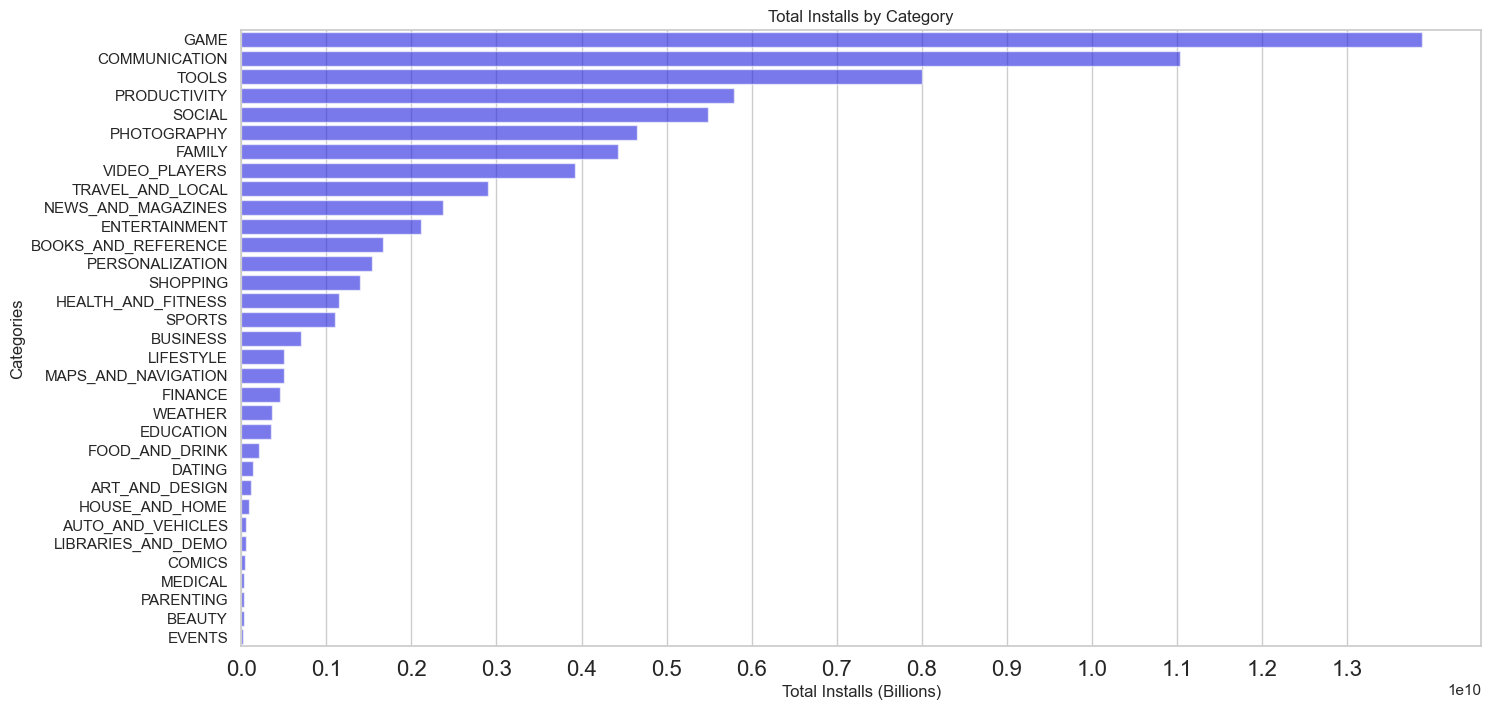

In [28]:
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (16,8))
sns.barplot(data = categories.sort_values('Total_Installs', ascending=False),
            x = 'Total_Installs', y = 'Category', color = 'blue', alpha = 0.6 ,ax= ax)
ax.set_title('Total Installs by Category')
ax.set_xlabel('Total Installs (Billions)')  
ax.set_ylabel('Categories')
plt.xticks(np.arange(0, 14000000000, step = 1000000000),size = 16) #Needs fix
_ = ax

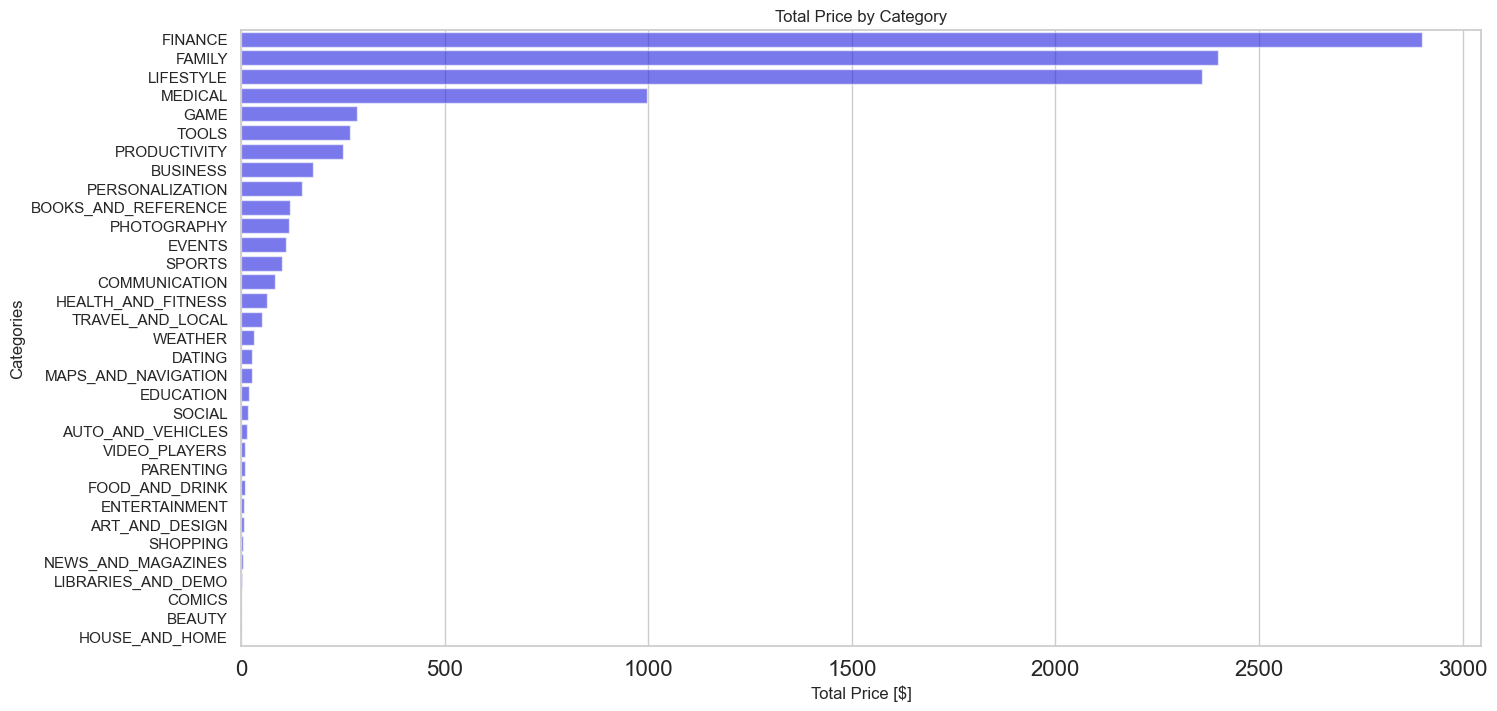

In [10]:
fig, ax = plt.subplots(figsize = (16,8))
sns.barplot(data = categories.sort_values('Total_Price', ascending=False),
            x = 'Total_Price', y = 'Category', color = 'blue', alpha = 0.6 ,ax= ax)
ax.set_title('Total Price by Category')
ax.set_xlabel('Total Price [$]')
ax.set_ylabel('Categories')
plt.xticks(size = 16)
_ = ax

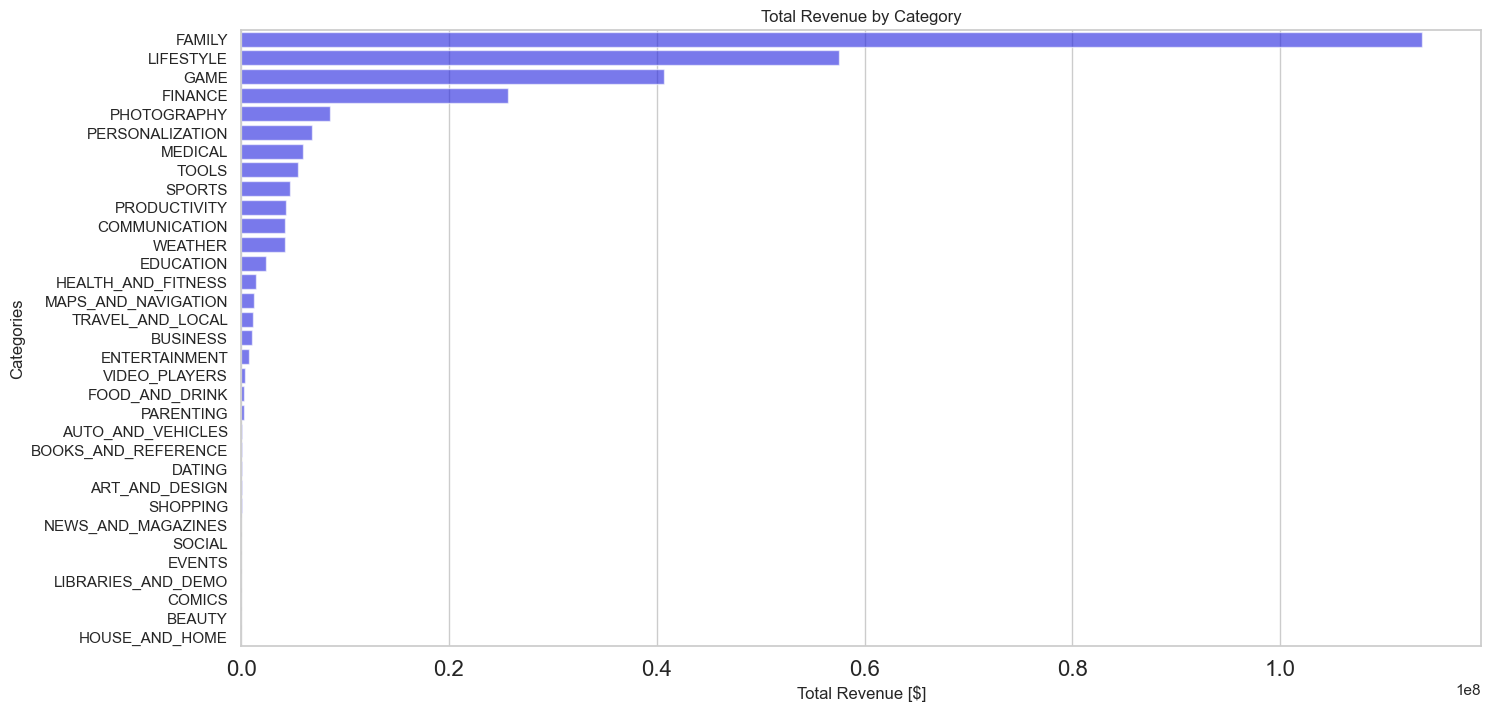

In [34]:
fig, ax = plt.subplots(figsize = (16,8))
sns.barplot(data = categories.sort_values('Total_Revenue', ascending=False),
            x = 'Total_Revenue', y = 'Category', color = 'blue', alpha = 0.6 ,ax= ax)
ax.set_title('Total Revenue by Category')
ax.set_xlabel('Total Revenue [$]')
ax.set_ylabel('Categories')
plt.xticks(size = 16)       #Needs fix
_ = ax

In [37]:
_df = categories.sort_values('Total_Revenue', ascending=False)
_df[-10:]

,Category,Total_Installs,Total_Price,Total_Revenue
7,DATING,140926107,27.440000,48461.499851
0,ART_AND_DESIGN,114338100,5.970000,31840.000160
26,SHOPPING,1400348785,5.480000,30149.000101
21,NEWS_AND_MAGAZINES,2369217760,3.980000,6445.000055
27,SOCIAL,5487867902,15.970000,5940.000060
10,EVENTS,15973161,109.989998,109.989998
17,LIBRARIES_AND_DEMO,52995910,0.990000,99.000001
5,COMICS,44981150,0.000000,0.000000
2,BEAUTY,27197050,0.000000,0.000000
16,HOUSE_AND_HOME,97212461,0.000000,0.000000


#### Task 2
Find top 5 apps that is smallest in size but highest in installs.
<br>
Note: The idea is to show that small apps don't necessarily have small number of installs. This has to be done on whole dataset (no need to split into any category). 
<br>
PS: I tried to plot the data using plotnine (ggplot2) and it was not really appealing so I swapped to seaborn

In [12]:
df = data.sort_values(['Installs', 'Size'], ascending=[False, True]).head(5)   #picking the top 5 after sorting the data
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Revenue
2977,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000000.0,1000000000,Free,0.0,Teen,0.0
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,20392871.0,1000000000,Free,0.0,Teen,0.0
299,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642848,20392871.0,1000000000,Free,0.0,Everyone,0.0
300,WhatsApp Messenger,COMMUNICATION,4.4,69119312,20392871.0,1000000000,Free,0.0,Everyone,0.0
302,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,20392871.0,1000000000,Free,0.0,Everyone,0.0


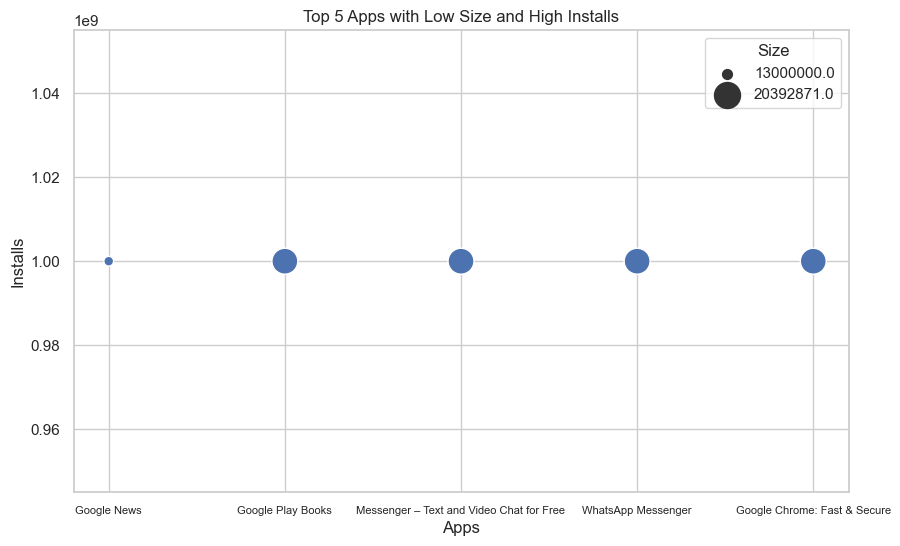

In [13]:
fig, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(data = df, x = 'App', y= 'Installs', size='Size', sizes= (50,350), ax = ax)
ax.set_title('Top 5 Apps with Low Size and High Installs')
ax.set_xlabel('Apps')
ax.set_ylabel('Installs')
plt.xticks(size = 8)
_ = ax

In [15]:
df[df.Installs == 1000000000].sort_values('Size', ascending=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Revenue
2977,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000000.0,1000000000,Free,0.0,Teen,0.0
2908,YouTube,VIDEO_PLAYERS,4.3,25655304,20392871.0,1000000000,Free,0.0,Teen,0.0
2720,Google Drive,PRODUCTIVITY,4.4,2731171,20392871.0,1000000000,Free,0.0,Everyone,0.0
2507,Google,TOOLS,4.4,8033493,20392871.0,1000000000,Free,0.0,Everyone,0.0
2429,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689,20392871.0,1000000000,Free,0.0,Everyone,0.0
2420,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,20392871.0,1000000000,Free,0.0,Everyone,0.0
2191,Google Photos,PHOTOGRAPHY,4.5,10858556,20392871.0,1000000000,Free,0.0,Everyone,0.0
2012,Google+,SOCIAL,4.2,4831125,20392871.0,1000000000,Free,0.0,Teen,0.0
2003,Instagram,SOCIAL,4.5,66577312,20392871.0,1000000000,Free,0.0,Teen,0.0
2002,Facebook,SOCIAL,4.1,78158304,20392871.0,1000000000,Free,0.0,Teen,0.0


#### Task 3
For each category, find top 5 installed free and paid apps. <br>
Note: if there is a group of apps that has no paid or free apps in it, it's not a problem, output is just 0

In [16]:
df = data.sort_values('Installs', ascending=False).groupby(['Category', 'Type']).head(5)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Revenue
300,WhatsApp Messenger,COMMUNICATION,4.4,69119312,2.039287e+07,1000000000,Free,0.000000,Everyone,0.000000
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,2.039287e+07,1000000000,Free,0.000000,Teen,0.000000
1356,Subway Surfers,GAME,4.5,27722264,7.600000e+07,1000000000,Free,0.000000,Everyone 10+,0.000000
2420,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,2.039287e+07,1000000000,Free,0.000000,Everyone,0.000000
304,Gmail,COMMUNICATION,4.3,4604324,2.039287e+07,1000000000,Free,0.000000,Everyone,0.000000
...,...,...,...,...,...,...,...,...,...,...
6599,SharedCare™ Co-parenting,PARENTING,2.0,23,2.039287e+07,100,Paid,4.590000,Everyone,459.000015
6739,Jeppesen CR Flight Computer,MAPS_AND_NAVIGATION,3.3,3,2.600000e+07,100,Paid,9.990000,Everyone,998.999977
3778,FORD V SERIES CALC - NO LIMIT,AUTO_AND_VEHICLES,4.2,2,1.700000e+07,50,Paid,9.990000,Everyone,499.499989
5599,BP Fitness Lead Scanner,EVENTS,4.2,0,6.700000e+06,1,Paid,109.989998,Everyone,109.989998


In [17]:
df.set_index(df['App']).groupby(['Category', 'Type'])['Installs'].nlargest(5).reset_index(2).head(50)

App  \
Category            Type                                                      
ART_AND_DESIGN      Free                              Sketch - Draw & Paint   
                    Free                         Textgram - write on photos   
                    Free  Canva: Poster, banner, card maker & graphic de...   
                    Free                     Tattoo Name On My Photo Editor   
                    Free                                       ibis Paint X   
                    Paid  X Launcher Pro - IOS Style Theme & Control Center   
                    Paid  X Launcher Pro: PhoneX Theme, OS11 Control Center   
                    Paid     X Launcher Prime: With OS Style Theme & No Ads   
AUTO_AND_VEHICLES   Free                      AutoScout24 - used car finder   
                    Free      Android Auto - Maps, Media, Messaging & Voice   
                    Free                                 Ulysse Speedometer   
                    Free                        Used cars for sale - Trovit   
                    Free  Fines of the State Traffic Safety Inspectorate...   
                    Paid                             Ulysse Speedometer Pro   
                    Paid                             Билеты ПДД CD 2019 PRO   
                    Paid                      FORD V SERIES CALC - NO LIMIT   
BEAUTY              Free                      Beauty Camera - Selfie Camera   
                    Free                       Best Hairstyles step by step   
                    Free                                      Selfie Camera   
                    Free                     ipsy: Makeup, Beauty, and Tips   
                    Free                                 Filters for Selfie   
BOOKS_AND_REFERENCE Free                                  Google Play Books   
                    Free                                              Bible   
                    Free                            Audiobooks from Audible   
                    Free                               Wattpad 📖 Free Books   
                    Free                                      Amazon Kindle   
                    Paid                      Al'Quran Bahasa Indonesia PRO   
                    Paid                         Don't Panic with Andrew J.   
                    Paid                      Officiel du SCRABBLE LAROUSSE   
                    Paid                           17th Edition Cable Sizer   
                    Paid                      Dungeons and Dragons DM Tools   
BUSINESS            Free             File Commander - File Manager/Explorer   
                    Free             OfficeSuite : Free Office + PDF Editor   
                    Free                                      Secure Folder   
                    Free  Vault-Hide SMS,Pics & Videos,App Lock,Cloud ba...   
                    Free                             Facebook Pages Manager   
                    Paid      TurboScan: scan documents and receipts in PDF   
                    Paid                     Tiny Scanner Pro: PDF Doc Scan   
                    Paid                                CM FILE MANAGER Pro   
                    Paid                                    BZ Reminder PRO   
                    Paid                       Super Resume Builder Pro, CV   
COMICS              Free                         LINE WEBTOON - Free Comics   
                    Free                                   Narrator's Voice   
                    Free                                     Perfect Viewer   
                    Free  comico Popular Original Cartoon Updated Everyd...   
                    Free                                             Comics   
COMMUNICATION       Free                                 WhatsApp Messenger   
                    Free                                              Gmail   
                    Free                       Google Chrome: Fast & Secure   
                    Free           Messenge

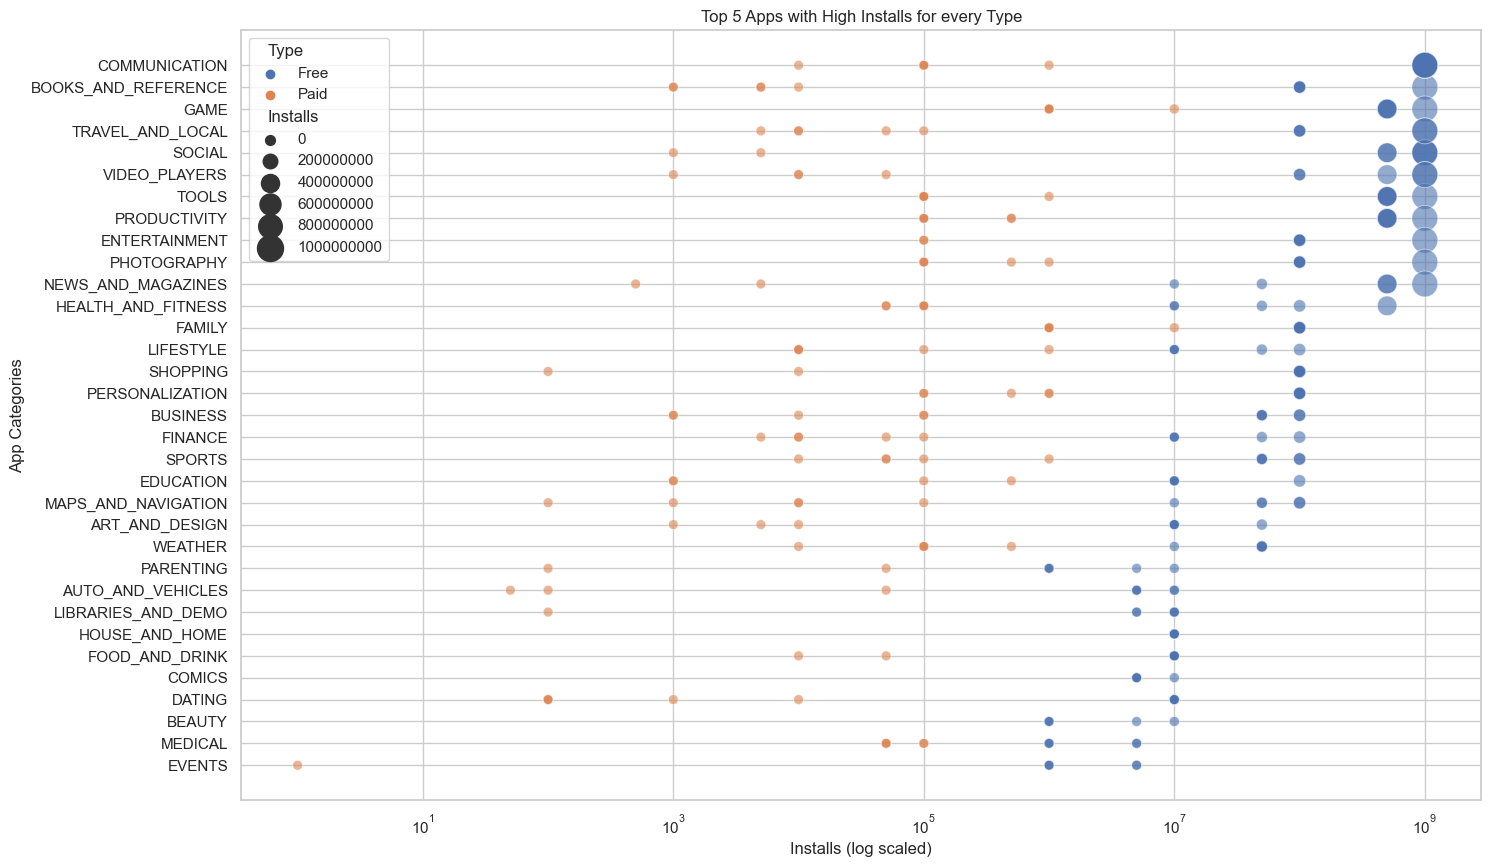

In [18]:
fig, ax = plt.subplots(figsize = (16,10))
sns.scatterplot(data = df, x = 'Installs', y= 'Category', hue='Type', size = 'Installs', sizes= (50,350), ax = ax, alpha = 0.6)
ax.set_title('Top 5 Apps with High Installs for every Type')
ax.set_ylabel('App Categories')
ax.set_xlabel('Installs (log scaled)')
plt.xscale('log')
_ = ax